Disclaimer: Let erop dit is een groepsopdracht van studenten en geen financieel advies.

# Case 2 groepsopdracht bloganalyse
In deze blog wordt gekeken wat voor effecten de interne en externe factoren hebben op de cryptomarkt.

## Inleiding
* Externe markt
* Interne markt

In [23]:
# Benodigde installaties.

In [24]:
# !pip install tweepy
# !pip install textblob
# !pip install matplotlib
# !pip install tweepy
# !pip install textblob
# !pip install matplotlib

## Importeren van modules

#### Hieronder hebben wij gebruik gemaakt van textblob, sys, tweepy, csv, re en matplotlib

In [25]:
from ipywidgets import interact
from textblob import TextBlob
import os,sys,tweepy,csv,re
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Sentiment Twitter in verband met cryptocurrencies

#### Hieronder hebben wij de API van twitter: tweepy, geinstalleerd. Daarbij hebben we de package textblob geinstalleerd, dit is een package die bijvoorbeeld het sentiment van bepaalde woorden kan analyseren. Denk hierbij aan woorden die worden gerefereerd aan positiviteit en woorden die referen naar negativiteit.

#### Voer hier de crypto in die je wilt analyseren

In [26]:
dropdown = widgets.Dropdown(
options = ['BTC', 'ETH', 'LINK', 'XTZ'], layout={'width': 'max-content'}, description='Crypto: ')

dropdown

Dropdown(description='Crypto: ', layout=Layout(width='max-content'), options=('BTC', 'ETH', 'LINK', 'XTZ'), va…

#### Voer hier in hoeveel tweets je wilt analyseren van de eerder opgegeven crypto

In [33]:
slider = widgets.IntSlider(
value = 0,
min = 0,
max = 500,
step = 10,
description = 'slider',
orientation = 'horizontal')

slider

IntSlider(value=0, description='slider', max=500, step=10)

#### Voer hieronder de cryptocurrency in die je wilt analyseren en hoeveel tweets je wilt analyseren (max. 500) van de afgelopen 7 dagen.

In [34]:
searchTerm = dropdown.value 
NoOfTerms = slider.value

In [35]:
searchTerm

'BTC'

In [36]:
NoOfTerms

150

#### Voor het analyseren van de zoekopdracht gebruiken we de volgende code

Hoe mensen reageren op BTC bij het analyseren van 150 tweets.

Algemeen Rapport: 
Zwak Positief

Gedetailleerd Rapport: 
9.333333333333334% mensen denken er positief over
19.333333333333332% mensen denken er zwak positief over
3.3333333333333335% mensen denken er sterk positief over
4.666666666666667% mensen denken er negatief over
10.0% mensen denken er sterk negatief over
0.6666666666666666% mensen denken er sterk negatief over
52.666666666666664% mensen denken er neutraal over


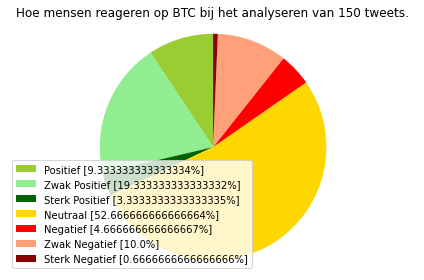

In [37]:
class SentimentAnalysis:
    def __init__(self):
        self.tweets = []
        self.tweetText = []
    def DownloadData(self):
        # Met de consumer_key, consumer_secret, acces_token en access_token_secret authentiseer je jezelf aan de API van twitter
        consumer_key = 'lNY0nv6NSzIMtggqwlXFa4BWX'
        consumer_secret = 'lLbxLS6wubvUWXerCGbbcm7jJFunBFESUSbbeIRxgu1DolDHAM'
        access_token = '211948218-Zl7dDiD4CwyqgXG6WG2VqauPhkiVzBHUbNKNQA0q'
        access_token_secret = 'uyCbQsjf5fnWSXGB43w2OgrJ9pXrHGc8qk2kn4F7S1YSF'
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token, access_token_secret)
        api = tweepy.API(auth)
        
        # Met de code hieronder wordt gezocht naar tweets (searchterm) en het aantal tweets (NoOfTerms)
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)
        # Om de data toe te voegen aan een csvFile wordt de functie open gebruikt
        csvFile = open('result.csv', 'a')
        # Gebruik csvWriter
        csvWriter = csv.writer(csvFile)
        # Variabele zijn hieronder aangemaakt
        polarity = 0
        positive = 0
        wpositive = 0
        spositive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0
        # ophalen van tweets
        for tweet in self.tweets:
            # Opslaan van de tweets om te gebruiken in csvFile via utf-8
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            # analyse met TextBlob
            analysis = TextBlob(tweet.text)
            # polarity uitprinten
            polarity += analysis.sentiment.polarity  # toevoegen van polarity om het gemiddelde sentiment te krijgen
            if (analysis.sentiment.polarity == 0):  # reactie toevoegen om later het gemiddelde sentiment hiervan op te halen
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1
                

        # opzoeken van het gemiddelde op hoe mensen reageren op in dit geval bepaalde cryptocurrencies
        positive = self.percentage(positive, NoOfTerms)
        wpositive = self.percentage(wpositive, NoOfTerms)
        spositive = self.percentage(spositive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)
        wnegative = self.percentage(wnegative, NoOfTerms)
        snegative = self.percentage(snegative, NoOfTerms)
        neutral = self.percentage(neutral, NoOfTerms)
        # vinden van gemiddelde sentiment
        polarity = polarity / NoOfTerms
        # uitprinten data
        print("Hoe mensen reageren op " + searchTerm + " bij het analyseren van " + str(NoOfTerms) + " tweets.")
        print()
        print("Algemeen Rapport: ")
        if (polarity == 0):
            print("Neutraal")
        elif (polarity > 0 and polarity <= 0.3):
            print("Zwak Positief")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positief")
        elif (polarity > 0.6 and polarity <= 1):
            print("Sterk Positief")
        elif (polarity > -0.3 and polarity <= 0):
            print("Zwak Negatief")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negatief")
        elif (polarity > -1 and polarity <= -0.6):
            print("Sterk Negatief")
        print()
        print("Gedetailleerd Rapport: ")
        print(str(positive) + "% mensen denken er positief over")
        print(str(wpositive) + "% mensen denken er zwak positief over")
        print(str(spositive) + "% mensen denken er sterk positief over")
        print(str(negative) + "% mensen denken er negatief over")
        print(str(wnegative) + "% mensen denken er sterk negatief over")
        print(str(snegative) + "% mensen denken er sterk negatief over")
        print(str(neutral) + "% mensen denken er neutraal over")

        self.plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)


    def cleanTweet(self, tweet):
        # Hiermee verwijderen we linkjes en speciale tekens zodat wij schone data krijgen
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    # Deze functie berekent het percentage en zet het antwoord op 2 decimalen.
    def percentage(self, part, whole):
        return 100 * float(part) / float(whole)
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positief [' + str(positive) + '%]', 'Zwak Positief [' + str(wpositive) + '%]','Sterk Positief [' + str(spositive) + '%]', 'Neutraal [' + str(neutral) + '%]',
                  'Negatief [' + str(negative) + '%]', 'Zwak Negatief [' + str(wnegative) + '%]', 'Sterk Negatief [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title("Hoe mensen reageren op " + searchTerm + " bij het analyseren van " + str(NoOfTerms) + " tweets.")
        plt.axis('equal')
        plt.tight_layout()
        plt.show()


# onderstaande code runt alle def's
if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.DownloadData()

In [38]:
def square(x):
    return x * x

In [39]:
interact(square, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [40]:
interact(square, x=(0, 100, 10));

interactive(children=(IntSlider(value=50, description='x', step=10), Output()), _dom_classes=('widget-interact…